In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
hres = fits.open('hrseds.fits')
jean_dat = np.load('jean_spherex_data.npz')

lbs = jean_dat['wavelengths']
specs = jean_dat['spectra']
error = jean_dat['error']

specs0 = np.zeros(specs.shape)
for i in range(len(specs0)):
    flux = hres[i+2].data['FLUX']
    lamb = hres[i+2].data['lambda']
    flux1 = np.interp(lbs, lamb, flux)
    specs0[i] = flux1


In [3]:
cigale = np.load('cigale_random_sed_att_err_20000.npz')
clbs = cigale['wavelengths']
cspecs = cigale['spectra']


In [4]:
snr = np.median(specs0, axis=1)[:,None]/error
idxs = np.random.randint(size=len(cspecs), low=0, high=len(specs0))

snr1 = snr[idxs]
cerror1 = np.median(cspecs, axis=1)[:,None]/snr1

In [5]:
cerror2 = cerror1/2.0

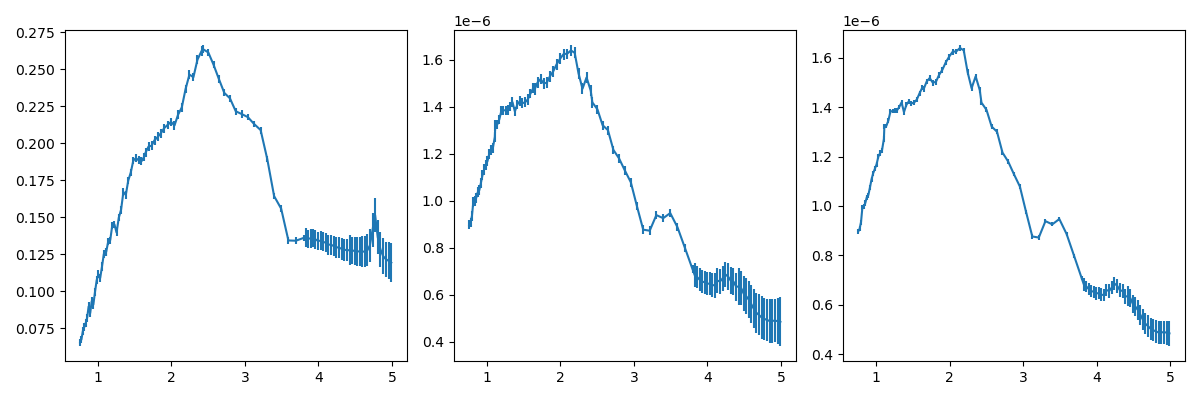

In [6]:
plt.close()
# fig = plt.figure(num=1)
fig, axs = plt.subplots(1,3, num=1, figsize=(12,4))
idx = 13
axs[0].errorbar(lbs, specs0[idxs[idx]], error[idxs[idx]])
# plt.errorbar(lbs, specs0[7291], error[7291])
axs[1].errorbar(lbs, cspecs[idx], cerror1[idx])
axs[2].errorbar(lbs, cspecs[idx], cerror2[idx])

fig.tight_layout()

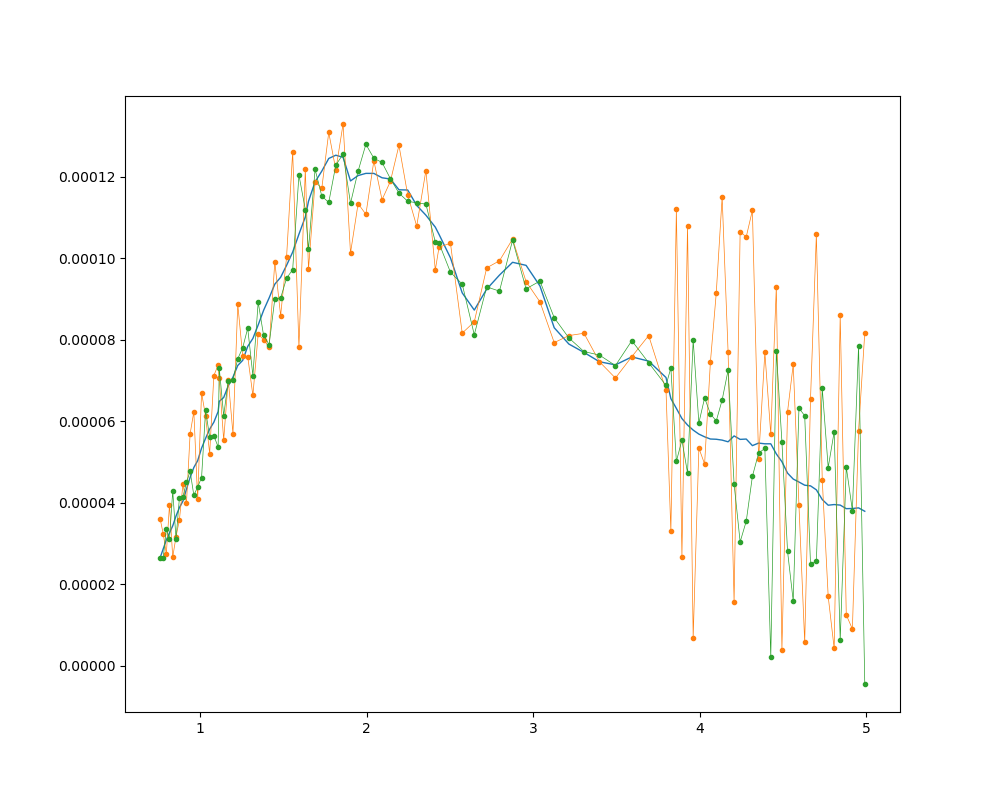

No such comm: e1dd28bf551841ce9e8bc99347c96542


In [7]:
cspecs1 = np.random.normal(cspecs, cerror1)
cspecs2 = np.random.normal(cspecs, cerror2)
plt.close()
fig = plt.figure(num=1, figsize=(10, 8))

idx = 2

plt.plot(lbs, cspecs[idx], linewidth=1)
plt.plot(lbs, cspecs1[idx], '.-', linewidth=0.5)
plt.plot(lbs, cspecs2[idx], '.-', linewidth=0.5)


In [8]:
list(cigale.keys())

['z',
 'wavelengths',
 'spectra',
 'error',
 'parameters',
 'parameter_names',
 'save_flambda']

In [9]:
np.savez('cigale_random_sed_att_Jean_1snr_20000.npz', 
         z=cigale['z'], wavelengths=clbs, spectra=cspecs1, error=cerror1, spectra_original=cspecs,
         parameters=cigale['parameters'], parameter_names=cigale['parameter_names'], save_flambda=cigale['save_flambda'])

np.savez('cigale_random_sed_att_Jean_2snr_20000.npz', 
         z=cigale['z'], wavelengths=clbs, spectra=cspecs2, error=cerror2, spectra_original=cspecs,
         parameters=cigale['parameters'], parameter_names=cigale['parameter_names'], save_flambda=cigale['save_flambda'])